In [1]:
!pip3 install natsort==5.3.3

In [2]:
!pip3 install scikit-image>=0.16.2

In [1]:
!pip3 install scikit-image==0.19.2

In [4]:
!pip3 install python-Levenshtein==0.12.0

In [5]:
!pip install -r requirements.txt

  Using cached appdirs-1.4.3-py2.py3-none-any.whl (12 kB)
  Using cached appnope-0.1.0-py2.py3-none-any.whl (4.0 kB)
  Using cached astroid-2.0.4-py3-none-any.whl (172 kB)
  Using cached backcall-0.1.0.zip (11 kB)
  Preparing metadata (setup.py) ... done
  Using cached bleach-2.1.3-py2.py3-none-any.whl (28 kB)
  Using cached certifi-2018.8.24-py2.py3-none-any.whl (147 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached cloudpickle-0.5.3-py2.py3-none-any.whl (13 kB)
  Using cached ConfigArgParse-0.13.0.tar.gz (31 kB)
  Preparing metadata (setup.py) ... done
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached dask-0.18.2-py2.py3-none-any.whl (645 kB)
  Using cached decorator-4.3.0-py2.py3-none-any.whl (9.2 kB)
  Using cached entrypoints-0.2.3-py2.py3-none-any.whl (9.4 kB)
  Using cached html5lib-1.0.1-py2.py3-none-any.whl (117 kB)
  Using cached idna-2.7-py2.py3-none-any.whl (58 kB)
  Using cached ipykernel-4.8.2-py3-none-any.whl (108 kB)
 

  Using cached widgetsnbextension-3.3.1-py2.py3-none-any.whl (2.2 MB)
  Using cached wrapt-1.10.11.tar.gz (27 kB)
  Preparing metadata (setup.py) ... done
  Using cached xlrd-1.1.0-py2.py3-none-any.whl (108 kB)
  Using cached xlwt-1.3.0-py2.py3-none-any.whl (99 kB)
  Using cached tables-3.8.0.tar.gz (8.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [11 lines of output]
      ld: library not found for -lhdf5
      clang: error: linker command failed with exit code 1 (use -v to see invocation)
      cpuinfo failed, assuming no CPU features: 'flags'
      * Using Python 3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:52:10)
      * Found cython 0.29.33
      * USE_PKGCONFIG: False
      * Found conda env: ``/Users/sagarm2/opt/miniconda3``
      .. ERROR:: Could not find a local HDF5 installation.
       

In [13]:
!pip install -e .

Obtaining file:///Users/sagarm2/Documents/OpticalPooledscreen/OpticalPooledScreens_2019-master/example_data
ERROR: file:///Users/sagarm2/Documents/OpticalPooledscreen/OpticalPooledScreens_2019-master/example_data does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [4]:
from ops.imports import *
from ops.process import Align
import ops.firesnake
from ops.firesnake import Snake



# runs example from example_data/ sub-directory of project
home = os.path.dirname(os.path.dirname(ops.__file__))
os.chdir(os.path.join(home, 'example_data'))

df_design = pd.read_csv('design.csv')

THRESHOLD_READS = 50
THRESHOLD_STD = 300
THRESHOLD_DAPI = 1200
THRESHOLD_CELL = 800
NUCLEUS_AREA = 0.25*150, 0.25*800
#WILDCARDS = dict(well='A1', tile='107') # this one was the original but does not have the phenotype file
WILDCARDS = dict(well='A1', tile='7')

In [2]:
WILDCARDS = dict(well='A1', tile='7')

In [23]:
def matplotCreation(img,x,y,stride):
    from matplotlib import pyplot as plt
    plt.imshow(img[x:x+stride,y:y+stride], interpolation='nearest')
    plt.rcParams['figure.figsize'] = [8, 6]
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    plt.show()
    return plt

def matplotCreation3(img,x,y,stride):
    from matplotlib import pyplot as plt
    plt.imshow(img[x:x+stride,y:y+stride,...], interpolation='nearest')
    plt.rcParams['figure.figsize'] = [8, 6]
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    plt.show()
    return plt
    

In [25]:
print(input_files[0])
print(description)
print(search)

inputIsa/Composite01.tif
{'subdir': 'process_ipynb', 'mag': '10X', 'well': 'A1', 'tile': '7', 'tag': 'sbs', 'ext': 'tif', 'file': 'input2/10X_c1-SBS-1/10X_c1-SBS-1_A1_Tile-7.sbs.tif'}
inputIsa/*.tif


In [24]:
# this is written for ISA acquired image from 03/01/2023
# CYCLE, CHANNEL, I, J -> data format
# search = 'inputIsa/*/*.tif'.format(**WILDCARDS)
search = 'inputIsa/*.tif'
input_files = natsorted(glob(search))
for f in input_files:
    print(f)

description = parse(input_files[0])
description['subdir'] = 'process_ipynb'
description.pop('cycle');

data = np.array([read(f) for f in input_files])
print(data.shape)

inputIsa/Composite01.tif
inputIsa/Composite02.tif
inputIsa/Composite03.tif
inputIsa/Composite04.tif
inputIsa/Composite05.tif


ValueError: failed to parse filename: inputIsa/Composite01.tif

In [7]:
# this is input for the lainey data, the previous section is for our data
#search = 'input/*/10X*{well}_Tile-{tile}.tif'.format(**WILDCARDS)
search = 'input2/*/10X*{well}_Tile-{tile}.sbs.tif'.format(**WILDCARDS)
input_files = natsorted(glob(search))
for f in input_files:
    print(f)

# used to format output filenames
description = parse(input_files[0])
description['subdir'] = 'process_ipynb1'
description.pop('cycle');

input2/10X_c1-SBS-1/10X_c1-SBS-1_A1_Tile-7.sbs.tif
input2/10X_c2-SBS-2/10X_c2-SBS-2_A1_Tile-7.sbs.tif
input2/10X_c3-SBS-3/10X_c3-SBS-3_A1_Tile-7.sbs.tif
input2/10X_c4-SBS-4/10X_c4-SBS-4_A1_Tile-7.sbs.tif
input2/10X_c5-SBS-5/10X_c5-SBS-5_A1_Tile-7.sbs.tif
input2/10X_c6-SBS-6/10X_c6-SBS-6_A1_Tile-7.sbs.tif
input2/10X_c7-SBS-7/10X_c7-SBS-7_A1_Tile-7.sbs.tif
input2/10X_c8-SBS-8/10X_c8-SBS-8_A1_Tile-7.sbs.tif
input2/10X_c9-SBS-9/10X_c9-SBS-9_A1_Tile-7.sbs.tif


In [6]:
print(description)

{'subdir': 'process_ipynb', 'mag': '10X', 'well': 'A1', 'tile': '7', 'tag': 'sbs', 'ext': 'tif', 'file': 'input2/10X_c1-SBS-1/10X_c1-SBS-1_A1_Tile-7.sbs.tif'}


In [13]:
# read temp phenotype image. This does not correspond to the original phenoptype for this well/tile
ph_search = 'input2/10X*{well}_Tile-{tile}.phenotype.tif'.format(**WILDCARDS)
ph_input_files = natsorted(glob(ph_search))
for f in ph_input_files:
    print(f)


input2/10X_c0-DAPI-p65mNeon_A1_Tile-7.phenotype.tif


In [9]:
description= {'subdir': 'process_ipynb', 'mag': '10X', 'well': 'A1', 'tile': '7', 'tag': 'sbs', 'ext': 'tif', 'file': 'input2/10X_c1-SBS-1/10X_c1-SBS-1_A1_Tile-7.sbs.tif'}

In [12]:
parse(input_files[0])

{'subdir': 'input2/10X_c1-SBS-1',
 'mag': '10X',
 'cycle': 'c1-SBS-1',
 'well': 'A1',
 'tile': '7',
 'tag': 'sbs',
 'ext': 'tif',
 'file': 'input2/10X_c1-SBS-1/10X_c1-SBS-1_A1_Tile-7.sbs.tif'}

### load, align, apply Laplacian-of-Gaussian filter (log)

In [11]:
data = np.array([read(f) for f in input_files])
aligned = Snake._align_SBS(data, method='DAPI')
save(name(description, tag='aligned'), aligned)

NameError: name 'description' is not defined

In [8]:
loged = Snake._transform_log(aligned, skip_index=0)
save(name(description, tag='log'), loged)


NameError: name 'description' is not defined

In [24]:
print(data.shape)

(5, 5, 2304, 2304)


In [25]:
maxed = Snake._max_filter(loged, 3, remove_index=0)
save(name(description, tag='maxed'), maxed)

In [15]:
#matplotCreation3(maxed,200,200,200)

In [26]:
print(maxed.shape)

(5, 4, 2304, 2304)


### detect candidate reads

In [28]:
std = Snake._compute_std(loged, remove_index=0)
save(name(description, tag='std'), std)

In [29]:
matplotCreation(std,200,200,200)

NameError: name 'matplotCreation' is not defined

In [19]:
print(std.shape)

(1024, 1024)


In [32]:
peaks = Snake._find_peaks(std)
save(name(description, tag='peaks'), peaks)

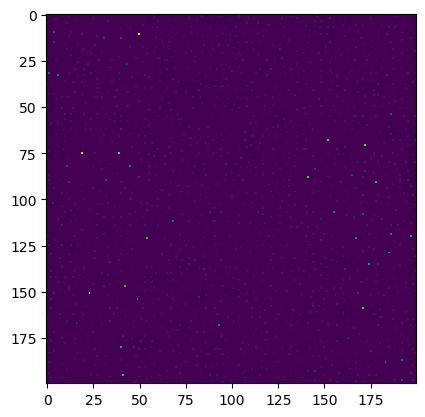

<module 'matplotlib.pyplot' from '/Users/sagarm2/opt/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [33]:
matplotCreation(peaks,200,200,200)

In [34]:
print(peaks.shape)

(2304, 2304)


### segment nuclei and cells

In [37]:
nuclei = Snake._segment_nuclei(data[0], THRESHOLD_DAPI,
 area_min=NUCLEUS_AREA[0], area_max=NUCLEUS_AREA[1])

save(name(description, tag='nuclei'), nuclei)

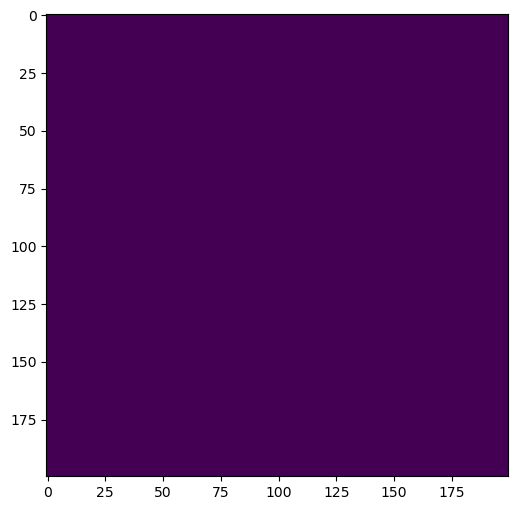

<module 'matplotlib.pyplot' from '/Users/sagarm2/opt/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [36]:
matplotCreation(nuclei,200,200,200)

In [38]:
print(nuclei.shape)

(2304, 2304)


In [39]:
cells = Snake._segment_cells(data[0], nuclei, THRESHOLD_CELL)
save(name(description, tag='cells'), cells)


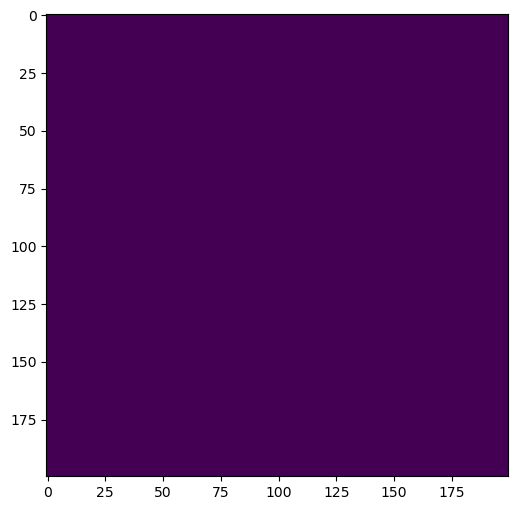

<module 'matplotlib.pyplot' from '/Users/sagarm2/opt/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [40]:
matplotCreation(cells,200,200,200)

In [28]:
import ops.in_situ
import ops.firesnake 

### extract base intensity, call reads, assign to cells

In [41]:
df_bases, index, values, labels, positions = Snake._extract_bases(maxed, peaks, cells, 
                        THRESHOLD_STD, wildcards=WILDCARDS)

            
df_bases.to_csv(name(description, tag='bases', ext='csv'), index=None)

test
see if this work
failed to reshape extracted pixels to sequencing bases, writing empty table


ValueError: not enough values to unpack (expected 2, got 0)

In [30]:
print(index)
print(df_bases)
print("after clean up ")
df_temp_sorted=df_bases.sort_values(["well", "tile", "cell", "read", "cycle", "channel"]);
print(df_temp_sorted)


(('cycle', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]), ('channel', ['G', 'T', 'A', 'C']))
         read  cycle channel  intensity  cell     i    j tile well
0           0      1       A        653     0     5   81  107   A1
1           0      1       C        431     0     5   81  107   A1
2           0      1       G         28     0     5   81  107   A1
3           0      1       T         16     0     5   81  107   A1
4           0      2       A         17     0     5   81  107   A1
...       ...    ...     ...        ...   ...   ...  ...  ...  ...
495547  10323     11       T          0  3630  1015  829  107   A1
495548  10323     12       A       2322  3630  1015  829  107   A1
495549  10323     12       C       1069  3630  1015  829  107   A1
495550  10323     12       G        291  3630  1015  829  107   A1
495551  10323     12       T        371  3630  1015  829  107   A1

[496320 rows x 9 columns]
after clean up 
         read  cycle channel  intensity  cell     i    j tile wel

In [67]:
print(positions)

[[   5   81]
 [   5  226]
 [   5  232]
 ...
 [1018  708]
 [1018  771]
 [1018  792]]


In [17]:
df_temp = ops.utils.ndarray_to_dataframe(values,index)
print(df_temp)

cycle      1                      2                    3        ...    10  \
channel     G    T     A     C     G     T    A    C    G    T  ...     A   
0          28   16   653   431   596    12   17   29   61   22  ...  1002   
1          37   41   879   521   801    17   12   13   48   77  ...  1149   
2          74   40   744   464   642    36   21   62   61  115  ...  1240   
3          32   36    80   646   220  1064   25   38   50   75  ...   515   
4         120  212   122   598   313  1631   67  169  166  271  ...  1794   
...       ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...   ...   
10335      48  360   136  1285   400  1808  130  384    0    0  ...  2628   
10336    3275  121    46    99   117   147  690  565    0    0  ...  2284   
10337      19   26  1091   716  1139   376  114  281    0    0  ...  2093   
10338      88  102    92   766   278  1695   86  266    0    0  ...  1703   
10339      35   81  1298   685  1073   112   96  217    0    0  ...  2072   

In [18]:
#df_temp = (df_temp.stack(["cycle", "channel"]))
df_positions = pd.DataFrame(positions, columns=["i", "j"])

In [68]:
print(df_bases)
print(labels)

         read  cycle channel  intensity  cell     i    j tile well
0           0      1       A        653     0     5   81  107   A1
1           0      1       C        431     0     5   81  107   A1
2           0      1       G         28     0     5   81  107   A1
3           0      1       T         16     0     5   81  107   A1
4           0      2       A         17     0     5   81  107   A1
...       ...    ...     ...        ...   ...   ...  ...  ...  ...
495547  10323     11       T          0  3630  1015  829  107   A1
495548  10323     12       A       2322  3630  1015  829  107   A1
495549  10323     12       C       1069  3630  1015  829  107   A1
495550  10323     12       G        291  3630  1015  829  107   A1
495551  10323     12       T        371  3630  1015  829  107   A1

[496320 rows x 9 columns]
[ 0  0 45 ...  0  0  0]


In [35]:
    df = (df_temp.stack(["cycle", "channel"])
       .reset_index()
       .rename(columns={0: "intensity", 'level_0': "read"})
       .join(pd.Series(labels, name="cell"), on="read")
       .join(df_positions, on="read")
       .sort_values(["cell", "read", "cycle"])
       )

In [36]:
print(df)

         read  cycle channel  intensity  cell     i    j
0           0      1       A        653     0     5   81
1           0      1       C        431     0     5   81
2           0      1       G         28     0     5   81
3           0      1       T         16     0     5   81
4           0      2       A         17     0     5   81
...       ...    ...     ...        ...   ...   ...  ...
495547  10323     11       T          0  3630  1015  829
495548  10323     12       A       2322  3630  1015  829
495549  10323     12       C       1069  3630  1015  829
495550  10323     12       G        291  3630  1015  829
495551  10323     12       T        371  3630  1015  829

[496320 rows x 7 columns]


In [24]:
df_reads = Snake._call_reads(df_bases) # does the quality Q index calculation
filename = name(description, tag='reads', ext='csv')
df_reads.to_csv(filename, index=None)

printing X sent to medians
[[[  70  438    0    3]
  [ 679  187    0    0]
  [   0    0  334 2632]
  ...
  [   0    0  456    0]
  [   0    0   40  637]
  [  90  313    0    0]]

 [[  47  433    7   85]
  [ 796  299    0   53]
  [  25    9  376 2710]
  ...
  [  24   10  587   39]
  [  20    0   42  487]
  [  46  345   42  210]]

 [[  68   92  517 2785]
  [  43   76  633 3101]
  [  53  125 1181  127]
  ...
  [ 379  203   86  105]
  [  51   95  310 1267]
  [  82  140  464 2618]]

 ...

 [[ 114  456  131  135]
  [  77  126  409 2532]
  [   0    0    0    0]
  ...
  [ 566  542  297  204]
  [ 231  437  604 2529]
  [ 819  524  167  167]]

 [[  24   60  365 2821]
  [  40   46 1228   74]
  [ 459  285  110  121]
  ...
  [  30   68  185 1229]
  [  67  279   56   93]
  [  49  137  283 2214]]

 [[ 105   87 2135  166]
  [ 258  414 1705  440]
  [   0    0    0    0]
  ...
  [ 273  507 1298  444]
  [ 305   45  651 1008]
  [ 727  824  596  575]]]
before call barcode
        read  cycle channel  intens

In [25]:
print(df_reads.shape)
print(df_reads)

(4603, 17)
        read  cell     i    j tile well    barcode       Q_0       Q_1  \
0          0     0     5  318    7   A1  ATGACGAGA  0.924105  1.000000   
36         1     0     5  339    7   A1  TTCCTATTC  1.000000  1.000000   
72         2     0     5  525    7   A1  TTTATGTCG  0.878977  0.923840   
108        3     0     5  534    7   A1  TTTATGTCG  1.000000  0.953716   
144        4     0     6  186    7   A1  TCATCGCAA  0.969053  1.000000   
...      ...   ...   ...  ...  ...  ...        ...       ...       ...   
163944  4554  3318   997  123    7   A1  GCTCATAGG  1.000000  1.000000   
164916  4581  3326  1006  175    7   A1  CTCGTCATA  1.000000  1.000000   
165384  4594  3326  1010  174    7   A1  CTAGTCATA  0.824236  1.000000   
164700  4575  3330  1004  522    7   A1  TGACAATCT  0.975745  1.000000   
165492  4597  3335  1012  230    7   A1  GGATACGTA  1.000000  0.451516   

             Q_2       Q_3       Q_4       Q_5       Q_6       Q_7       Q_8  \
0       1.000000  1.

In [26]:
print(sorted(WILDCARDS.items()))
for k,v in sorted(WILDCARDS.items()):
    print (k,v)
    df_bases[k] = v

[('tile', '7'), ('well', 'A1')]
tile 7
well A1


In [27]:
print(df_reads)

        read  cell     i    j tile well    barcode       Q_0       Q_1  \
0          0     0     5  318    7   A1  ATGACGAGA  0.924105  1.000000   
36         1     0     5  339    7   A1  TTCCTATTC  1.000000  1.000000   
72         2     0     5  525    7   A1  TTTATGTCG  0.878977  0.923840   
108        3     0     5  534    7   A1  TTTATGTCG  1.000000  0.953716   
144        4     0     6  186    7   A1  TCATCGCAA  0.969053  1.000000   
...      ...   ...   ...  ...  ...  ...        ...       ...       ...   
163944  4554  3318   997  123    7   A1  GCTCATAGG  1.000000  1.000000   
164916  4581  3326  1006  175    7   A1  CTCGTCATA  1.000000  1.000000   
165384  4594  3326  1010  174    7   A1  CTAGTCATA  0.824236  1.000000   
164700  4575  3330  1004  522    7   A1  TGACAATCT  0.975745  1.000000   
165492  4597  3335  1012  230    7   A1  GGATACGTA  1.000000  0.451516   

             Q_2       Q_3       Q_4       Q_5       Q_6       Q_7       Q_8  \
0       1.000000  1.000000  1.0

In [28]:
df_reads.describe()

,read,cell,i,j,Q_0,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_min
count,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000
mean,2301.000000,1617.409733,477.651749,456.300239,0.865676,0.888539,0.833771,0.825813,0.814547,0.786741,0.777696,0.785898,0.765680,0.552314
std,1328.915974,919.988592,269.510241,274.775839,0.182763,0.177837,0.231499,0.217414,0.217400,0.228996,0.237229,0.231204,0.235895,0.230001
min,0.000000,0.000000,5.000000,5.000000,0.002722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1150.500000,857.000000,257.000000,220.000000,0.782934,0.832768,0.748733,0.714482,0.688149,0.642205,0.623128,0.648367,0.606158,0.426927
50%,2301.000000,1607.000000,466.000000,438.000000,0.943820,0.984474,0.927829,0.914409,0.886873,0.851447,0.838734,0.844349,0.817225,0.587481
75%,3451.500000,2413.000000,696.000000,675.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.721094
max,4602.000000,3335.000000,1014.000000,1018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# read from csv to match numerical precision of snakemake pipeline
df_reads = pd.read_csv(filename) 
df_cells = Snake._call_cells(df_reads)
df_cells.to_csv(name(description, tag='cells', ext='csv'), index=None)

In [71]:
print(df_cells)

       cell  tile well cell_barcode_0  cell_barcode_count_0 cell_barcode_1  \
264      37   107   A1   AGATGGGTTCCG                     1            NaN   
265      45   107   A1   AGCTTTCTGACT                     2            NaN   
267      46   107   A1   GAATGGACAGCG                     3            NaN   
270      49   107   A1   GAACTCAGGACA                     3            NaN   
273      50   107   A1   AGCTTTCTGACT                     1            NaN   
...     ...   ...  ...            ...                   ...            ...   
10324  3626   107   A1   CTAAAAAAAAAA                     3   AGAAAAAAAAAC   
10330  3627   107   A1   AGAAAAAAAACA                     1   AGAAAAAACACA   
10332  3628   107   A1   GAAAAAAAGAAC                     1            NaN   
10333  3629   107   A1   AGAATCATGACG                     3   CTAAAAAAAACA   
10337  3630   107   A1   AGAAAAAAAAAA                     2   AGAAACATCACA   

       cell_barcode_count_1  barcode_count  
264               

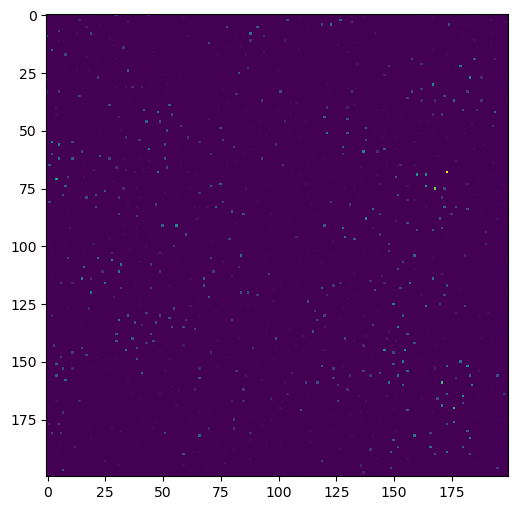

In [30]:
from matplotlib import pyplot as plt
plt.imshow(peaks[200:400,200:400], interpolation='nearest')
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.show()

In [45]:
### phenotype try

In [31]:

LUTS = [
    ops.io.GRAY,
    ops.io.GREEN,
    ops.io.RED,
    ops.io.MAGENTA,
    ops.io.CYAN
]


In [32]:

ph_data = read(ph_input_files[0])
ph_aligned = Snake._align_by_DAPI(data_1=data[0], data_2=ph_data)
save(name(description, tag='phenotype_aligned'),ph_aligned, luts=LUTS[:2])

In [33]:
df_phenotype = Snake._extract_phenotype_FR(
    data_phenotype=ph_aligned,
    nuclei=nuclei,
    wildcards=WILDCARDS
)
df_phenotype.to_csv(name(description, tag='phenotype', ext='csv'), index=None)

In [34]:
#this following code does work now (02/21/23)
df_phenotype = Snake._extract_named_cell_nucleus_features(
    data=ph_aligned,
    cells=cells,
    nuclei=nuclei,
    nucleus_features=[
        'label', # required to join SBS and phenotype data
        'i',
        'j',
        'area',
        'dapi_gfp_corr',
        'dapi_max',
        'dapi_mean',
        'dapi_median',
        'gfp_max',
        'gfp_mean',
        'gfp_median',
    ],
    cell_features=['label', 'area'],
    wildcards=WILDCARDS
)
df_phenotype.to_csv(name(description, tag='phenotype', ext='csv'), index=None)

In [35]:
print(df_phenotype)

      cell  area_cell       i_cell       j_cell    i_nucleus    j_nucleus  \
0       32        163    10.024540   168.153374     8.605263   167.157895   
1       33        202     9.658416   845.608911     9.260417   845.781250   
2       41        192    12.968750   220.385417    13.281250   221.203125   
3       43        234    13.893162   641.397436    13.220000   641.180000   
4       44         94    14.904255   597.787234    14.350000   596.675000   
...    ...        ...          ...          ...          ...          ...   
3196  3328        126  1008.833333   280.325397  1008.793651   279.698413   
3197  3330        229  1009.078603   528.908297  1009.151515   529.262626   
3198  3334        225  1010.048889  1002.293333  1010.118644  1003.415254   
3199  3335        186  1010.854839   234.688172  1011.093023   234.511628   
3200  3343        216  1013.504630   852.509259  1013.872549   853.558824   

      area_nucleus  dapi_gfp_corr_nucleus  dapi_max_nucleus  \
0           

In [36]:
barcodes = pd.read_csv('barcodes.csv')
SBS_CYCLES = [1, 2, 3, 4, 5, 7, 8, 9, 10]
DISPLAY_RANGES = [
    [500, 15000],
    [100, 10000],
    [100, 20000],
    [100, 8000],
    [100, 6000]
]

df_combined = Snake._merge_sbs_phenotype(
    sbs_tables=df_cells, 
    phenotype_tables=df_phenotype,
    barcode_table=barcodes, 
    sbs_cycles=SBS_CYCLES
)
df_combined.to_csv(name(description, tag='combined', ext='csv'), index=None)
#mathced values found here in df_combined

In [37]:
print(df_combined)

     well tile  cell cell_barcode_0  cell_barcode_count_0 cell_barcode_1  \
0      A1    7    41      CATACGGTC                   2.0            NaN   
1      A1    7    43      TTGAAGATT                   2.0            NaN   
2      A1    7    46      TTCATAGGA                   1.0            NaN   
3      A1    7    54      GTAATCTAC                   1.0            NaN   
4      A1    7    55      TAAAGGTAA                   1.0            NaN   
...   ...  ...   ...            ...                   ...            ...   
4896   A1    7  3328            NaN                   NaN            NaN   
4897   A1    7  3330            NaN                   NaN            NaN   
4898   A1    7  3334            NaN                   NaN            NaN   
4899   A1    7  3335            NaN                   NaN            NaN   
4900   A1    7  3343            NaN                   NaN            NaN   

      cell_barcode_count_1  barcode_count  area_cell       i_cell  ...  \
0            

In [36]:
### extract base intensity, call reads, assign to cells

In [38]:
annotate_luts = LUTS + [ops.annotate.GRMC, ops.io.GRAY]
annotate_display_ranges = [(a/4, b/4) for a,b in DISPLAY_RANGES] + [[0, 4]]
annotate_SBS = Snake._annotate_SBS(log=loged, df_reads=df_reads)
save(name(description, tag='annotate_SBS'), annotate_SBS,
     display_ranges=annotate_display_ranges, luts=annotate_luts, compress=1)

In [39]:
# second-to-last channel annotates base calls (notches are mapped reads, pluses are unmapped reads)
# last channel encodes peaks value 
annotate_extra_luts = LUTS + [ops.annotate.GRMC, ops.io.GRAY, ops.io.GRAY]
annotate_extra_display_ranges = (
    [(a/4, b/4) for a,b in DISPLAY_RANGES]
    +[[0, 4], [0, THRESHOLD_READS*4], [0, 30]]
)
annotate_SBS_extra = Snake._annotate_SBS_extra(
    log=loged,
    peaks=peaks,
    df_reads=df_reads,
    barcode_table=barcodes,
    sbs_cycles=SBS_CYCLES
)
save(name(description, tag='annotate_SBS_extra'), annotate_SBS_extra,
     display_ranges=annotate_extra_display_ranges[1:], luts=annotate_extra_luts[1:], compress=1)

/Users/sagarm2/Documents/OpticalPooledscreen/OpticalPooledScreens_2019-master/ops/firesnake.py:432: FutureWarning: `selem` is a deprecated argument name for `dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  peaks_donut = skimage.morphology.dilation(peaks, selem=np.ones((3, 3)))


In [48]:
WILDCARDS = dict(well='A1', tile='7')
print(WILDCARDS)

{'well': 'A1', 'tile': '7'}


In [49]:
print(search)

input2/*/10X*A1_Tile-107.sbs.tif


In [50]:
search = 'input2/*/10X*{well}_Tile-{tile}.sbs.tif'.format(**WILDCARDS)
input_files = natsorted(glob(search))
for f in input_files:
    print(f)

input2/10X_c1-SBS-1/10X_c1-SBS-1_A1_Tile-7.sbs.tif
input2/10X_c2-SBS-2/10X_c2-SBS-2_A1_Tile-7.sbs.tif
input2/10X_c3-SBS-3/10X_c3-SBS-3_A1_Tile-7.sbs.tif
input2/10X_c4-SBS-4/10X_c4-SBS-4_A1_Tile-7.sbs.tif
input2/10X_c5-SBS-5/10X_c5-SBS-5_A1_Tile-7.sbs.tif
input2/10X_c6-SBS-6/10X_c6-SBS-6_A1_Tile-7.sbs.tif
input2/10X_c7-SBS-7/10X_c7-SBS-7_A1_Tile-7.sbs.tif
input2/10X_c8-SBS-8/10X_c8-SBS-8_A1_Tile-7.sbs.tif
input2/10X_c9-SBS-9/10X_c9-SBS-9_A1_Tile-7.sbs.tif
